# Noise Sweep

### Fixed Hyperparams

In [1]:
# Namespace(activation='sigmoid', batch_size=4, learning_rate=0.1,
#n_epochs=1000, n_hidden=150, n_visible=100, output=None, reg_lambda=0.001, regularization='normal')
ACTIVATION = 'sigmoid'
BATCH_SIZE = 4
LEARNING_RATE = 0.1
N_EPOCHS = 1000
N_HIDDEN = 150
N_VISIBLE = 100
OUTPUT = None
REG_LAMBDA = 0.001
REGULARIZATION = 'normal'

### Imports

In [2]:
from rbm import *

### Generate Base Data

In [3]:
data = generate_numerals()

print(f"Shape of data: {data.shape}")

Shape of data: (8, 100)


In [9]:
noise_levels = [0.01, 0.025, 0.04, 0.05, 0.06, 0.075, 0.1]
# for noise_level in noise_levels:
#     noisy_data.append(add_custom_noise(data, noise_level=noise_level))  # Reduced noise level

### Create the RBM for each Noise Level

In [10]:
def get_accuracy(data, reconstructed_data, threshold=30):
    correct_reconstructions = 0
    for i in range(len(data)):
        distance = hamming_distance(data[i], reconstructed_data[i])
        if distance <= threshold:
            correct_reconstructions += 1

    accuracy = correct_reconstructions / len(data) * 100
    return accuracy

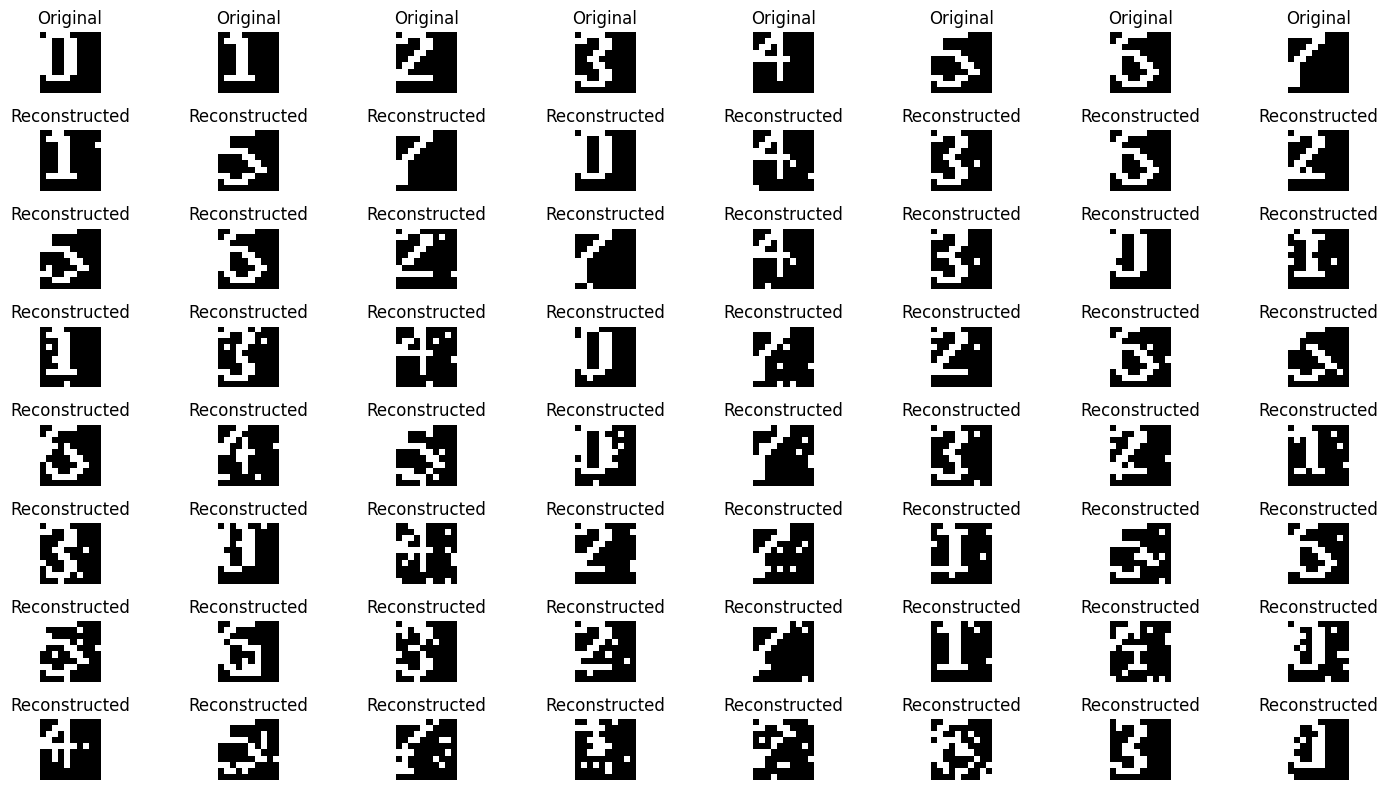

In [24]:
errors = []
accs = []

logging.disable(logging.INFO)

fig, axes = plt.subplots(1 + len(noise_levels), 8, figsize=(15, 8))
for i in range(8):
    axes[0, i].imshow(data[i].reshape(10, 10), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

for j, noise_level in enumerate(noise_levels):
    noisy_data = add_custom_noise(data, noise_level=noise_level)
    rbm = RestrictedBoltzmannMachine(
        n_visible=N_VISIBLE,
        n_hidden=N_HIDDEN,
        learning_rate=LEARNING_RATE,
        n_epochs=N_EPOCHS,
        batch_size=BATCH_SIZE,
        activation=ACTIVATION,
        regularization=REGULARIZATION,
        reg_lambda=REG_LAMBDA
    )
    rbm.train(noisy_data)
    
    # Visualize original, noisy, and reconstructed data
    reconstructed_data = rbm.reconstruct(noisy_data)
    reconstructed_data = binarize_data(reconstructed_data)
    
    # Calculate and display reconstruction error
    reconstruction_error = calculate_reconstruction_error(data, reconstructed_data)
    accuracy = get_accuracy(data, reconstructed_data)
    
    errors.append(reconstruction_error)
    accs.append(accuracy)
    
    for i in range(8):
        axes[1+j, i].imshow(reconstructed_data[i].reshape(10, 10), cmap='gray')
        axes[1+j, i].set_title(f"Reconstructed")
        axes[1+j, i].axis('off')

plt.tight_layout()
plt.show()
    

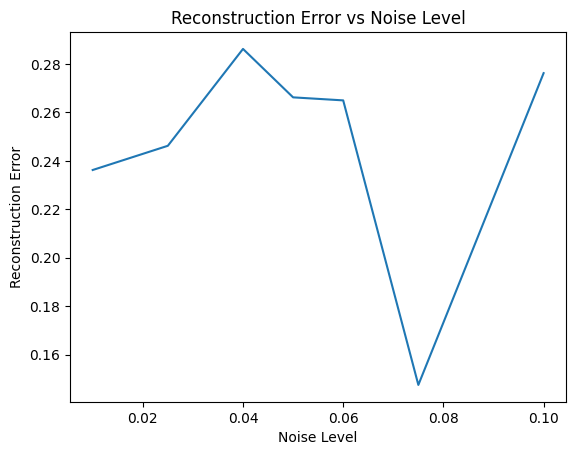

In [22]:
plt.plot(noise_levels, errors)
plt.title("Reconstruction Error vs Noise Level")
plt.xlabel("Noise Level")
plt.ylabel("Reconstruction Error");

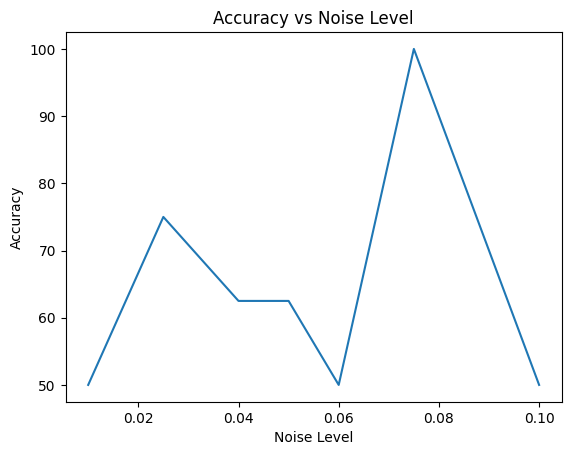

In [23]:
plt.plot(noise_levels, accs)
plt.title("Accuracy vs Noise Level")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy");